In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [80]:
dataset=pd.read_csv('./climate_crop.csv')

In [81]:
dataset.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Continent
0,Albania,Maize,1990,1485,121.0,16.37,36613,Europe
1,Albania,Potatoes,1990,1485,121.0,16.37,66667,Europe
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333,Europe
3,Albania,Sorghum,1990,1485,121.0,16.37,12500,Europe
4,Albania,Soybeans,1990,1485,121.0,16.37,7000,Europe


In [92]:
x=dataset.iloc[:,3:6]
y=dataset.iloc[:,6]

In [93]:
x.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1485,121.0,16.37
1,1485,121.0,16.37
2,1485,121.0,16.37
3,1485,121.0,16.37
4,1485,121.0,16.37


In [94]:
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

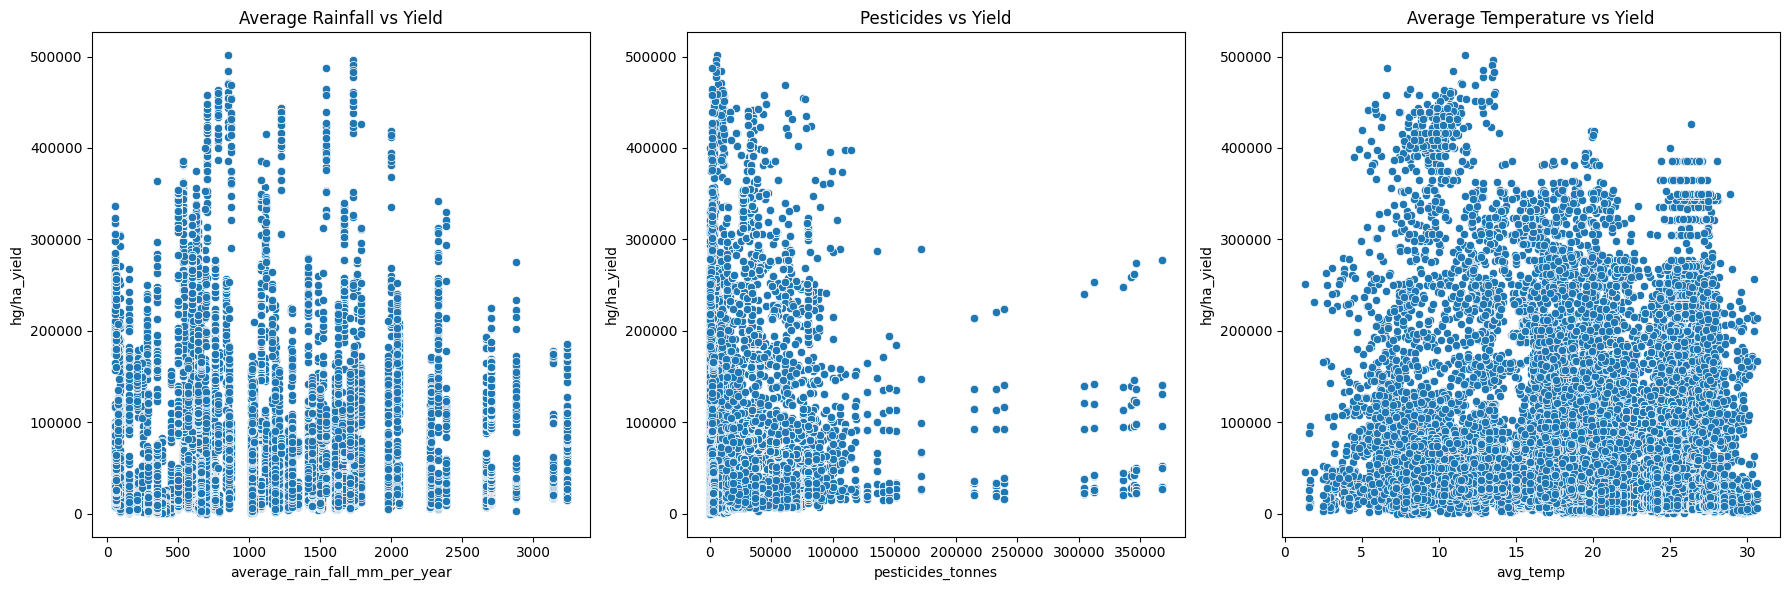

In [95]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: average_rain_fall_mm_per_year vs hg/ha_yield
sns.scatterplot(ax=axes[0], x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=dataset)
axes[0].set_title('Average Rainfall vs Yield')

# Plot 2: pesticides_tonnes vs hg/ha_yield
sns.scatterplot(ax=axes[1], x='pesticides_tonnes', y='hg/ha_yield', data=dataset)
axes[1].set_title('Pesticides vs Yield')

# Plot 3: avg_temp vs hg/ha_yield
sns.scatterplot(ax=axes[2], x='avg_temp', y='hg/ha_yield', data=dataset)
axes[2].set_title('Average Temperature vs Yield')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [96]:
pf=PolynomialFeatures(degree=12)

In [97]:
pf.fit(x)

PolynomialFeatures(degree=12)

In [98]:
x=pf.transform(x)

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [100]:
lr=LogisticRegression(max_iter=1000)

In [101]:
lr.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Test set accuracy: 0.0


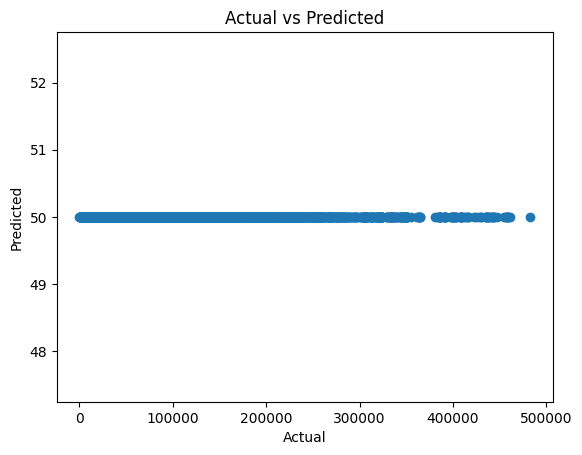

In [102]:
# Evaluate the model
accuracy = lr.score(x_test, y_test)
print(f"Test set accuracy: {accuracy}")

# Optionally, you can make predictions and plot results if necessary
y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()